# Churn Case Study

##### Submission By:
- Vishal Shyam Khialani
- Raghavendra Galagali


<strong>Business Objectives:</strong><br/>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn

## Checkpoint 1: Data Understanding and Exploration

In [1]:
# Need to supress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Central place to import all libraries 
import numpy as np
import pandas as pd


# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for creating models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# another tool for creating models
import sklearn

# for scaling the independent variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


# required by the project guidelines to calculate the r2_score
from sklearn.metrics import r2_score

# used to build the linear model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# RFE ( Recurisve Feature Elmination) tool 
# is used to find the most influencial features in a dataset
from sklearn.feature_selection import RFE

# this tool helps to split the original data frame to train and test dataframes
from sklearn.model_selection import train_test_split


# for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [3]:
# as the dataframe can have alot of columns we are setting the max to 140 
pd.set_option('display.max_columns', 140)

- Load Data
- check size , info and describe


In [4]:
# load the dataset using read_csv into churn_data
churn_data = pd.read_csv("telecom_churn_data.csv")


In [5]:
# shape of the dataset
churn_data.shape

(99999, 226)

In [6]:
# display 1st five rows of the dataset
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,...,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,...,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,...,0,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,...,0,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,Na

------------------

### List of Helper Functions

In [7]:
# function to display the null values based on given percentage
def checkNullValues(df, percentage):
    NA_features = round(100*(df.isnull().sum()/len(df.index))).sort_values(ascending=False)
    return NA_features.loc[NA_features > percentage]

### End List of Helper Functions

--------------------------------------

## Checkpoint 2: Data visualization and understanding the Data

- check some eda plots
- use heatmaps
- share some insights you might find

--------------

## Checkpoint 3: Data Cleaning

- Sanity check see if customer id is unique
- Decide what to do for null values. As per Arhiant we can disregard
- check data types and fix them
- remove columns for the 9 month and make a new column to define churn
- Define High Value customers from 6,7 month this needs to be round 30k users
  We can't use arpu to define high value customers
- Add dervied metrics we need 15 metrics
- remove circle ids
- handle outliers in amount and usage



In [8]:
# Sanity check see if each mobile number is unique
# if not then we might need to merge them
# If the value is true then we can move on
churn_data.mobile_number.is_unique


True

In [9]:
# List of Columns we can drop
colums_to_drop = ['mobile_number',
'circle_id' ]


# churn_data.drop(colums_to_drop,axis=1,inplace=True)
# mobile_number and circle_id won't be needed they won't add any informtion to our preditive abilities 

In [10]:
# Check percentage wise how many null values exsist in each column
pd.set_option('display.max_rows', 500)
checkNullValues(churn_data,0)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

In [11]:
# After checking the value counts for different fb_user_* we noticed 0 has some significance
# 2153 users seem to avail of data but dont' use facebook services from the tel operator
# hence we will leave the null values as is for now

# We have decied not to inpute Nan values for now
churn_data.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

As per us `0` does not mean null and has some user behavioral information in it. Fow now we are not going to impute to 0. We might want to later visit it if our models are having issues

This is also true for the date columns

In [12]:
# impute the data with mode where data missing is around 1%
churn_data.last_date_of_month_7 = churn_data.last_date_of_month_7.fillna(churn_data.last_date_of_month_7.mode()[0])
churn_data.last_date_of_month_8 = churn_data.last_date_of_month_8.fillna(churn_data.last_date_of_month_8.mode()[0])
churn_data.last_date_of_month_9 = churn_data.last_date_of_month_9.fillna(churn_data.last_date_of_month_9.mode()[0])

# impute the data with mode where data missing is around 2-4%
churn_data.date_of_last_rech_6 = churn_data.date_of_last_rech_6.fillna(churn_data.date_of_last_rech_6.mode()[0])
churn_data.date_of_last_rech_7 = churn_data.date_of_last_rech_7.fillna(churn_data.date_of_last_rech_7.mode()[0])
churn_data.date_of_last_rech_8 = churn_data.date_of_last_rech_8.fillna(churn_data.date_of_last_rech_8.mode()[0])
churn_data.date_of_last_rech_9 = churn_data.date_of_last_rech_9.fillna(churn_data.date_of_last_rech_9.mode()[0])

In [13]:
# drop the columns where missing data is more than 70%
#churn_data = churn_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1)

In [14]:
# Now lets check the data types and see if we need to change any
# checking string dtypes
# we need to convert to datetime
object_list = churn_data.select_dtypes(include='object')
list_of_columns_date = object_list.columns
list_of_columns_date

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [15]:
#date_columns = list(churn_data.filter(regex='date').columns)
#date_columns

In [16]:
# converting to list_of_columns_date
for column in list_of_columns_date:
    churn_data[column] = pd.to_datetime(churn_data[column], format='%m/%d/%Y', errors='coerce')

In [17]:
#checking to see the dtypes now
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


In [18]:
# Now lets check the data types and see if we need to change any
# checking int64
pd.set_option('display.max_rows', 500)
float_list = churn_data.select_dtypes(include='float64')
list_Columns_float = float_list.columns


In [19]:
# printing all the names of columsn to review them manually 
for n in list_Columns_float:
    print(n)


loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_6
std_og_mou_7
std_og_mou_8
std_og_mou_9
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
isd_og_mou_9
spl_og_mou_6
sp

In [20]:
# Now lets check the data types and see if we need to change any
# checking int64
int_list = churn_data.select_dtypes(include='int64')
int_list.columns

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

### Evaluating High Value Customers (HVC) 

In [21]:
# calculating high value customers based on the previous 3 months recharge ()
# total recharge amount = number recharges * average recharge amount
churn_data['total_rech_data_amt_6'] = churn_data['total_rech_data_6'] * churn_data['av_rech_amt_data_6']
churn_data['total_rech_data_amt_7'] = churn_data['total_rech_data_7'] * churn_data['av_rech_amt_data_7']
churn_data['total_rech_data_amt_8'] = churn_data['total_rech_data_8'] * churn_data['av_rech_amt_data_8']
churn_data['total_rech_data_amt_9'] = churn_data['total_rech_data_9'] * churn_data['av_rech_amt_data_9']

In [22]:
# calculate total recharge amount (calls recharge + data recharge)
churn_data['total_amt_6'] = churn_data.total_rech_amt_6 + churn_data.total_rech_data_amt_6
churn_data['total_amt_7'] = churn_data.total_rech_amt_7 + churn_data.total_rech_data_amt_7
churn_data['total_amt_8'] = churn_data.total_rech_amt_8 + churn_data.total_rech_data_amt_8
churn_data['total_amt_9'] = churn_data.total_rech_amt_9 + churn_data.total_rech_data_amt_9


#### Calculating High Value Customer using Total recharge amount for calls & data

In [23]:
# taking average of June & July month recharges
average_rech_amt_67 = (churn_data['total_amt_6'].fillna(0)+churn_data['total_amt_7'].fillna(0))/2

In [24]:
# consider the data till 70th percentile
churn_data_hvc = churn_data[average_rech_amt_67 >= np.percentile(average_rech_amt_67,70)]

In [25]:
# shape of HVC
churn_data_hvc.shape

(30000, 234)

In [26]:
# Dataframe which has the high value customers
churn_data_hvc.shape

(30000, 234)

In [27]:
# saving file to review it manually
# churn_data_hvc.to_csv('churn_data_hvc.csv')

#### Evaluate <b>churn</b> based on the usage of calls & data 

In [28]:
churn_data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
1,188.04,72.11,0.0,0.0
4,205.31,104.59,0.0,0.0
8,34.91,142.18,0.0,0.0
9,412.63,151.33,0.0,0.0


In [29]:
# create a new feature "churn" based on calls & data for 9th month

# As per the project attributes we need to churn based on
#total_ic_mou_9
#total_og_mou_9
#vol_2g_mb_9
#vol_3g_mb_9
churn_data_hvc['churn'] = np.where(churn_data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)




In [30]:
churn_data_hvc.shape

(30000, 235)

In [31]:
# checking the distribution 
churn_data_hvc['churn'].value_counts()

0    27459
1     2541
Name: churn, dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

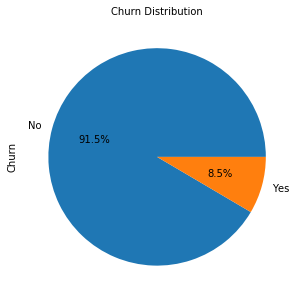

In [32]:
#Churn Distribution
ax = (churn_data_hvc['churn'].value_counts()*100.0 /len(churn_data_hvc)).plot.pie(autopct='%.1f%%', labels=['No','Yes'],figsize=(5,5), fontsize = 10)                                                                           

ax.set_ylabel('Churn',fontsize = 10)
ax.set_title('Churn Distribution', fontsize = 10)

##### New features to be created 
1. Create columns based on total data used (e.g. vol_2g_mb_6 + vol_3g_mb_6)
   * vol_data_mb_6
   * vol_data_mb_7
   * vol_data_mb_8
   * vol_data_mb_9
2. Create columns based on outgoing to incoming call ratio (e.g. total_og_mou_6/total_ic_mou_6)
   * og_to_ic_mou_6
   * og_to_ic_mou_7
   * og_to_ic_mou_8
   * og_to_ic_mou_9
3. Create columns for outgoing local calls to incoming local calls
   * for all months
4. Create columns for outgoing roaming calls to incoming roaming calls
   * for all months


As per business requirement the action month is the 8th month. We need to dervice metrics which our models can leverage.

5. Percentage drop in data volume in 8th Month. 
6. Percentage drop in number of minutes soken in calls in 8th Month. 
7. Any spike in call center calls in the 8th month. 
8. Any drop in recharge amounts in the 8th Month.

----------------

1. Create columns based on total data used (e.g. vol_2g_mb_6 + vol_3g_mb_6)

In [33]:
# create new features for total data usage (2g+3g)
for i in range(6,10):
    churn_data_hvc['total_vol_data_mb_'+str(i)] = (churn_data_hvc['vol_2g_mb_'+str(i)]+churn_data_hvc['vol_3g_mb_'+str(i)]).astype(int)

2. Create columns based on outgoing to incoming call ratio (e.g. total_og_mou_6/total_ic_mou_6)

In [34]:
# create new features for outgoing to incoming call ratio
for i in range(6,9):
    churn_data_hvc['og_to_ic_mou_'+str(i)] = (churn_data_hvc['total_og_mou_'+str(i)])/(churn_data_hvc['total_ic_mou_'+str(i)]+1)

3. Create columns for outgoing local calls to incoming local calls

In [35]:
# create new features for local outgoing to local incoming call ratio
for i in range(6,9):
    churn_data_hvc['loc_og_to_ic_mou_'+str(i)] = (churn_data_hvc['loc_og_mou_'+str(i)])/(churn_data_hvc['loc_ic_mou_'+str(i)]+1)

4. Create columns for outgoing roaming calls to incoming roaming calls

In [36]:
# create new features for roaming outgoing calls to roaming incoming calls ratio
for i in range(6,9):
    churn_data_hvc['Total_roam_mou_'+str(i)] = (churn_data_hvc['roam_ic_mou_'+str(i)])+(churn_data_hvc['roam_og_mou_'+str(i)]+1)

In [37]:
# churn_data_hvc.to_csv('churn_data_hvc_temp_before.csv')

5. Percentage drop in data volume in 8th Month. 

In [38]:
# Percentage drop in data volume in 8th Month.
churn_data_hvc['percentage_change_data_mb_8'] = churn_data_hvc['total_vol_data_mb_8']/(((churn_data_hvc['total_vol_data_mb_6'] + churn_data_hvc['total_vol_data_mb_7'])+1)/2)

In [39]:
# saving the file to do a sanity check 
churn_data_hvc_temp = churn_data_hvc[['percentage_change_data_mb_8','total_vol_data_mb_8','total_vol_data_mb_6','total_vol_data_mb_7','churn']]
# churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

### There is a percentage drop in avg usage for churn customers in data too

------------------

6. Percentage drop in number of minutes soken in calls in 8th Month. 

In [40]:
columns_mou = [col for col in churn_data_hvc.columns if 'mou' in col]
print(columns_mou)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', '

In [41]:
# After a revew below is the list of columns we have identified 
# which we hold data for the number of minutes used in the 6th and 7th month

columns_mou_67 = ['onnet_mou_6',
'onnet_mou_7',
'offnet_mou_6',
'offnet_mou_7',
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_og_mou_6',
'roam_og_mou_7',
'loc_og_t2t_mou_6',
'loc_og_t2t_mou_7',
'loc_og_t2m_mou_6',
'loc_og_t2m_mou_7',
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_mou_6',
'loc_og_mou_7',
'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_mou_6',
'std_og_mou_7',
'isd_og_mou_6',
'isd_og_mou_7',
'total_og_mou_6',
'total_og_mou_7',
'loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_mou_6',
'loc_ic_mou_7',
'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7',
'std_ic_mou_6',
'std_ic_mou_7',
'total_ic_mou_6',
'total_ic_mou_7',
'spl_ic_mou_6',
'spl_ic_mou_7',
'isd_ic_mou_6',
'isd_ic_mou_7',
'og_to_ic_mou_6',
'og_to_ic_mou_7',
'loc_og_to_ic_mou_6',
'loc_og_to_ic_mou_7',
'Total_roam_mou_6',
'Total_roam_mou_7']

#Below is the columsn for the 8th month
columns_mou_8 = ['onnet_mou_8',
'offnet_mou_8',
'roam_ic_mou_8',
'roam_og_mou_8',
'loc_og_t2t_mou_8',
'loc_og_t2m_mou_8',
'loc_og_t2f_mou_8',
'loc_og_t2c_mou_8',
'loc_og_mou_8',
'std_og_t2t_mou_8',
'std_og_t2m_mou_8',
'std_og_t2f_mou_8',
'std_og_mou_8',
'isd_og_mou_8',
'total_og_mou_8',
'loc_ic_t2t_mou_8',
'loc_ic_t2m_mou_8',
'loc_ic_t2f_mou_8',
'loc_ic_mou_8',
'std_ic_t2t_mou_8',
'std_ic_t2m_mou_8',
'std_ic_t2f_mou_8',
'std_ic_t2o_mou_8',
'std_ic_mou_8',
'total_ic_mou_8',
'spl_ic_mou_8',
'isd_ic_mou_8',
'og_to_ic_mou_8',
'loc_og_to_ic_mou_8',
'Total_roam_mou_8']

In [42]:
# When calculating the mou we have dicarded the below columsn as they don't explain usage of the user
'''
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'spl_og_mou_9',
'loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',

'''

"\n'std_og_t2c_mou_6',\n'std_og_t2c_mou_7',\n'std_og_t2c_mou_8',\n'std_og_t2c_mou_9',\n'spl_og_mou_6',\n'spl_og_mou_7',\n'spl_og_mou_8',\n'spl_og_mou_9',\n'loc_og_t2o_mou',\n'std_og_t2o_mou',\n'loc_ic_t2o_mou',\n\n"

In [43]:
# Any change in the call usage might be a good indicator for us

# - calculate total minutes in 6 and 7 month used
churn_data_hvc['avg_total_mou_67'] = churn_data_hvc[columns_mou_67].sum(axis=1).astype(int)



# divide by two to get an average of two months
churn_data_hvc['avg_total_mou_67'] = churn_data_hvc['avg_total_mou_67']/2

# - calculate total calls made in 8th month  to call centr
churn_data_hvc['total_mou_8'] = churn_data_hvc[columns_mou_8].sum(axis=1).astype(int)

# - get a percentage change
churn_data_hvc['percentage_mou_8'] = churn_data_hvc['total_mou_8']/(churn_data_hvc['avg_total_mou_67']+1)

#churn_data_hvc_temp = churn_data_hvc[['percentage_mou_8','total_mou_8','avg_total_mou_67','churn']]
#churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

### There is an avg drop in minutes used in month 8 . This should be usefull for our model

7. Any spike in call center calls in the 8th month. 

In [44]:
# get a list of columns which are assosiated to the call center
columns_t2c = [col for col in churn_data_hvc.columns if 't2c' in col]
print(columns_t2c)

['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9']


In [45]:
# imputing 0 for null values 
churn_data_hvc['loc_og_t2c_mou_6'].fillna(0,inplace=True)
churn_data_hvc['std_og_t2c_mou_6'].fillna(0,inplace=True)
churn_data_hvc['loc_og_t2c_mou_7'].fillna(0,inplace=True)
churn_data_hvc['std_og_t2c_mou_7'].fillna(0,inplace=True)
churn_data_hvc['loc_og_t2c_mou_8'].fillna(0,inplace=True)
churn_data_hvc['std_og_t2c_mou_8'].fillna(0,inplace=True)

In [46]:
# Any spike in call center calls in the 8th month.

# - calculate total calls made in 6 and 7 month to call center
churn_data_hvc['total_t2c_67'] = (churn_data_hvc['loc_og_t2c_mou_6']+churn_data_hvc['std_og_t2c_mou_6']+churn_data_hvc['loc_og_t2c_mou_7']+churn_data_hvc['std_og_t2c_mou_7']).astype(int)

# divide by two to get an average of two months
churn_data_hvc['total_t2c_67'] = churn_data_hvc['total_t2c_67']/2

# - calculate total calls made in 8th month  to call centr
churn_data_hvc['total_t2c_8'] = (churn_data_hvc['loc_og_t2c_mou_8']+churn_data_hvc['std_og_t2c_mou_8']).astype(int)

# - get a percentage change
churn_data_hvc['percentage_t2c_8'] = churn_data_hvc['total_t2c_8']/(churn_data_hvc['total_t2c_67']+1)

churn_data_hvc_temp = churn_data_hvc[['percentage_t2c_8','churn']]
churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

### It seems if the user calls the call center they are more likely to stick with the telcom company

------------------

8. Any drop in recharge amounts in the 8th Month.

In [47]:
# get a list of all columns related to recharges
columns_rech = [col for col in churn_data_hvc.columns if 'rech' in col]
print(columns_rech)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'total_rech_data_amt_9']


In [48]:
# Calculate any changes and maybe drop in recharges

churn_data_hvc['total_avg_rech_amt_67'] = (churn_data_hvc['total_rech_amt_6']+churn_data_hvc['total_rech_amt_7'])/2
churn_data_hvc['percentage_change_rech_8'] = churn_data_hvc['total_rech_amt_8']/(churn_data_hvc['total_avg_rech_amt_67']+1) 

churn_data_hvc_temp = churn_data_hvc[['percentage_change_rech_8','churn']]
churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

In [49]:
churn_data_hvc.shape

(30000, 257)

### After doing a review it seems the avg churn user seems to drop the recharges in the 8th month. This might be helpfull in the model

----------------

### Deleting unwanted  columns

In [50]:
# Now that we have the churn column we do not need any column for the 9th month
columns_9 = [col for col in churn_data_hvc.columns if '_9' in col]
print(columns_9)
churn_data_hvc = churn_data_hvc.drop(columns_9,axis=1)


['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9',

In [51]:
churn_data_hvc.shape

(30000, 200)

In [52]:
# List of Columns we can drop
colums_to_drop = ['mobile_number',
'circle_id' ]

#mobile_number and circle_id won't be needed they won't add any informtion to our preditive abilities 
churn_data_hvc.drop(colums_to_drop,axis=1,inplace=True)

In [53]:
# drop the features as we have captured them in our derviced metrics
'''
churn_data_hvc = churn_data_hvc.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9',
                                       'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9',
                                       'total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9',
                                       'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9',
                                       'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9',
                                       'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9',
                                       'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9'],axis=1)
'''
churn_data_hvc = churn_data_hvc.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
                                       'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                                       'total_og_mou_6','total_og_mou_7','total_og_mou_8',
                                       'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                                       'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
                                       'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
                                       'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],axis=1)


---------------------


## Checkpoint 4: Data preparation

- scale
- Create dummy variables if needed
- Oversampling of data since the data is skewed


#### Scale

---------------------

In [54]:
# take a copy of dataframe for model building
churn_df = churn_data_hvc.copy()

In [55]:
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,...,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_amt_6,total_amt_7,total_amt_8,churn,total_vol_data_mb_6,total_vol_data_mb_7,total_vol_data_mb_8,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8,percentage_change_data_mb_8,avg_total_mou_67,total_mou_8,percentage_mou_8,total_t2c_67,total_t2c_8,percentage_t2c_8,total_avg_rech_amt_67,percentage_change_rech_8
0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1,113,152,115,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,1.0,0.864662,0.0,17,17.000000,0.0,0,0.0,307.0,0.818182
1,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,0.0,0.00,2.35,5.90,0.00,12.49,0.0,...,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,NaN,0.00,0.00,NaN,28.61,7.60,NaN,0.0,0.0,0,1,0,0,0,2,0,0,0,0,0,0,NaN,1.0,1.0,1006,0.00,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0,0,108,365,1.448437,1.696569,0.736400,1.761573,1.430296,0.731602,1.0,1.0,1.0,6.697248,610.5,2496,4.081766,1.0,0,0.0,229.0,1.230435
4,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.0,0.0,50.31,149.44,83.89,67.64,91.88,124.26,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,105.68,88.49,233.81,106.84,109.54,104.13,1.5,0.00,0.00,0.0,0.00,0.86,1.93,0.25,0.00,0.0,...,NaN,56.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,56.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0

In [56]:
checkNullValues(churn_df,0)

total_amt_8                 32.0
total_rech_data_8           32.0
arpu_2g_8                   32.0
arpu_3g_8                   32.0
fb_user_8                   32.0
av_rech_amt_data_8          32.0
count_rech_3g_8             32.0
total_rech_data_amt_8       32.0
count_rech_2g_8             32.0
max_rech_data_8             32.0
night_pck_user_8            32.0
date_of_last_rech_data_8    32.0
total_rech_data_6           20.0
count_rech_3g_6             20.0
night_pck_user_6            20.0
arpu_2g_6                   20.0
fb_user_6                   20.0
arpu_3g_6                   20.0
av_rech_amt_data_6          20.0
total_amt_6                 20.0
total_rech_data_amt_6       20.0
count_rech_2g_6             20.0
date_of_last_rech_data_6    20.0
max_rech_data_6             20.0
fb_user_7                   19.0
night_pck_user_7            19.0
arpu_2g_7                   19.0
max_rech_data_7             19.0
arpu_3g_7                   19.0
date_of_last_rech_data_7    19.0
count_rech

In [57]:
# dropping columns which have more than 30% of missing values
churn_df = churn_df.loc[:, churn_df.isnull().mean() < .3]

In [58]:
# create corr matrix
df_corr_matrix = churn_df.corr().abs()

# Select top features from correlation matrix
top_feat = df_corr_matrix.where(np.triu(np.ones(df_corr_matrix.shape), k=1).astype(np.bool))

# select features with correlation greater than 0.8
drop_feat = [column for column in top_feat.columns if any(top_feat[column] > 0.8)]

# drop features from dataframe 
churn_df.drop(drop_feat, axis=1, inplace=True)

In [59]:
churn_df.shape

(30000, 127)

In [60]:
checkNullValues(churn_df,0)

max_rech_data_6             20.0
date_of_last_rech_data_6    20.0
night_pck_user_6            20.0
fb_user_6                   20.0
av_rech_amt_data_6          20.0
count_rech_3g_6             20.0
total_rech_data_amt_6       20.0
total_rech_data_6           20.0
max_rech_data_7             19.0
total_rech_data_7           19.0
arpu_3g_7                   19.0
fb_user_7                   19.0
av_rech_amt_data_7          19.0
count_rech_3g_7             19.0
total_rech_data_amt_7       19.0
night_pck_user_7            19.0
date_of_last_rech_data_7    19.0
std_og_t2f_mou_8             6.0
spl_ic_mou_8                 6.0
og_others_8                  6.0
std_ic_t2o_mou_8             6.0
std_ic_t2f_mou_8             6.0
isd_ic_mou_8                 6.0
std_og_mou_8                 6.0
std_ic_t2m_mou_8             6.0
spl_og_mou_8                 6.0
std_ic_t2t_mou_8             6.0
ic_others_8                  6.0
loc_ic_t2f_mou_8             6.0
roam_og_mou_8                6.0
loc_og_t2f

In [61]:
# dropping the date columns as they have around 20% null values
# adding a mode or 0 won't help and will only add noise to the data
churn_df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7'], axis=1, inplace=True)

In [62]:
# impute na values with 0 for the rest of the data types
list_of_columns_impute_temp = checkNullValues(churn_df,0)

# get it as a list
list_of_columns_impute = list_of_columns_impute_temp.index.values

# now we are going to impute
for columnName in list_of_columns_impute:
    churn_df[columnName].fillna(0,inplace=True)


In [63]:
# Deleting the date columns as SMOTE does not work with the date columns
columns_date = [col for col in churn_df.columns if 'date' in col]

# lets del date columns and see if the imbalance if fixed
churn_df = churn_df.drop(columns_date,axis=1)


In [64]:
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,arpu_3g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,churn,total_vol_data_mb_6,total_vol_data_mb_7,total_vol_data_mb_8,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8,percentage_change_data_mb_8,avg_total_mou_67,total_mou_8,percentage_mou_8,percentage_t2c_8,percentage_change_rech_8
0,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,1.15,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,4,3,2,252,252,252,252,252,252,1.0,1.0,252.0,252.0,1.0,1.0,252.0,252.0,212.17,0.0,0.0,0,0,0,0,1,0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,1,113,152,115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.864662,0.0,17,17.000000,0.0,0.818182
1,0.0,0.0,0.0,34.047,355.074,268.321,24.11,78.68,15.74,99.84,304.76,0.0,0.0,0.0,23.88,74.56,11.51,75.94,0.0,0.0,0.0,0.0,2.91,0.00,0.23,4.11,0.0,0.0,0.0,0.0,0.0,0.0,4.58,0.13,0.0,4.68,23.43,12.76,0.0,0.0,0.0,1.61,17.48,65.38,0.0,8.93,3.61,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,44,154,65,44,23,30,0.0,1.0,0.0,154.0,0.0,0.0,0.0,154.0,0.00,0.0,0.0,0,1,0,2,0,0,0.0,1.0,1006,0.00,0.00,0.00,0.00,0.0,154.0,0,0,108,365,1.448437,1.696569,0.736400,1.761573,1.430296,0.731602,6.697248,610.5,2496,4.081766,0.0,1.230435
4,0.0,0.0,0.0,261.636,309.876,238.174,50.31,149.44,76.96,91.88,124.26,0.0,0.0,0.0,50.31,149.44,67.64,91.88,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,105.68,106.84,109.54,1.5,0.00,0.00,0.0,0.00,0.86,1.93,0.25,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.48,0.0,0.0,5,6,3,56,110,110,50,110,110,1.0,0.0,56.0,0.0,0.0,0.0,56.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0.0,0.0,1526,0.00,0.00,0.00,0.00,56.0,0.0,0,0,0,0,0.585357,1.210949,0.612578,0.548575,1.212470,0.614150,0.000000,1361.5,1851,1.358532,0.0,1.047445
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,94.66,80.63,136.48,0.0,0.0,0.0,297.13,217.59,80.96,70.58,0.0,0.0,0.0,0.0,0.00,7.15,116.56,133.43,0.0,0.0,0.0,0.0,0.0,0.0,143.48,98.28,0.0,0.00,0.00,10.23,0.0,0.0,0.0,23.84,57.58,13.98,0.0,0.00,0.00,0.0,0.58,0.10,22.43,4.08,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,19,21,14,90,154,30,50,0,10,0.0,2.0,0.0,154.0,0.0,0.0,0.0,177.0,0.00,0.0,0.0,0,1,0,3,0,0,0.0,1.0,315,21.03,910.65,122.16,0.00,0.0

In [65]:
churn_df.shape

(30000, 119)

In [66]:
# Split the dataframe into X & y
X = churn_df.drop(['churn'], axis=1)
y = churn_df['churn']

churn_df.drop('churn', axis=1, inplace=True)


In [67]:
# Split X,y into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [68]:
X_train.shape, X_test.shape

((21000, 118), (9000, 118))

In [69]:
# we are using MinMaxScaler 
scaler = MinMaxScaler()

list_of_columns = X_train.columns
X_train[list_of_columns] = scaler.fit_transform(X_train[list_of_columns])
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,arpu_3g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_vol_data_mb_6,total_vol_data_mb_7,total_vol_data_mb_8,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8,percentage_change_data_mb_8,avg_total_mou_67,total_mou_8,percentage_mou_8,percentage_t2c_8,percentage_change_rech_8
16180,0.0,0.0,0.0,0.046737,0.062544,0.041965,0.032680,0.036829,0.036744,0.021158,0.006620,0.012731,0.113441,0.119172,0.005799,0.004546,0.020544,0.017336,0.022610,0.028160,0.000000,0.125376,0.000000,0.000000,0.025769,0.013388,0.000000,0.003650,0.0,0.0,0.0,0.0,0.015042,0.000000,0.000056,0.060336,0.005492,0.000000,0.000000,0.0,0.0,0.010531,0.035396,0.019899,0.014484,0.005593,0.000000,0.036984,0.014848,0.000000,0.004900,0.009989,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.052092,0.039118,0.000000,0.000856,0.007975,0.000000,0.129310,0.094203,0.047244,0.028667,0.041290,0.045468,0.030952,0.060952,0.045468,0.016393,0.000000,0.026367,0.000000,0.034483,0.000000,0.006926,0.000000,0.005201,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,1.0,0.0,0.607341,0.000000,0.000000,0.002556,0.001143,0.001097,0.000000,0.006975,0.000000,0.000000,0.000512,0.000858,0.000000,0.000712,0.002086,0.000000,0.000000,0.089130,0.046250,0.000247,0.000000,0.000857
15664,0.0,0.0,0.0,0.083510,0.089129,0.071804,0.039749,0.040946,0.061816,0.036915,0.027409,0.000000,0.000000,0.000000,0.053047,0.044304,0.089526,0.078250,0.021187,0.014951,0.010318,0.000000,0.000000,0.010175,0.000259,0.000755,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000856,0.001729,0.000000,0.003085,0.000675,0.007156,0.000000,0.0,0.0,0.033788,0.051140,0.077900,0.031423,0.012763,0.042605,0.000280,0.000993,0.000964,0.000622,0.002207,0.006693,0.000000,0.000499,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001622,0.000729,0.010076,0.137931,0.079710,0.062992,0.084000,0.081290,0.076387,0.057143,0.060952,0.076387,0.049180,0.037037,0.162058,0.162058,0.103448,0.058824,0.092061,0.115464,0.096664,0.0,0.0,0.00,0.0,0.0,0.000000,0.2,0.00000,1.0,1.0,0.451823,0.076786,0.213116,0.163127,0.048573,0.043760,0.018301,0.045304,0.066526,0.037355,0.000945,0.001438,0.000316,0.001846,0.002562,0.000936,0.000057,0.118142,0.091925,0.000370,0.038961,0.001059
28095,0.0,0.0,0.0,0.035811,0.035467,0.033064,0.000819,0.000222,0.020339,0.002518,0.005982,0.000000,0.000000,0.000000,0.001101,0.000245,0.025962,0.005461,0.000000,0.000000,0.010263,0.003448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.

#### Create dummy variables if needed

-------------

### there are no dummy variables

#### Oversampling of data since the data is skewed

----------------

In [70]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=42)
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 19188, 1: 1812})
After Counter({1: 19188, 0: 19188})


-----------

## Checkpoint 5: Model building and evaluation

- Build a two base models say tree and logistics 
- Then build PCA dataframe
- USE PCA in logistic
- Then hyper parameters on tree
- measure accuracy, precission and a few other parameters

### Model building using plain data


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# logistic regression on raw dataset
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Accuracy Score using Logistic Regression: ")
print(round(100*accuracy_score(y_test,y_pred),2))
print("\n")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score using Logistic Regression: 
92.01


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8271
           1       0.58      0.05      0.09       729

    accuracy                           0.92      9000
   macro avg       0.75      0.52      0.52      9000
weighted avg       0.89      0.92      0.89      9000

[[8245   26]
 [ 693   36]]


In [72]:
from sklearn import svm

# SVM model
svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print("Accuracy Score using SVM: ")
print(round(100*accuracy_score(y_test,y_pred),2))
print("\n")
print(classification_report(y_test,y_pred))

Accuracy Score using SVM: 
91.9


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8271
           1       0.00      0.00      0.00       729

    accuracy                           0.92      9000
   macro avg       0.46      0.50      0.48      9000
weighted avg       0.84      0.92      0.88      9000



In [73]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=7)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Accuracy score using Decision Tree: ")
print(round(100*accuracy_score(y_test,y_pred),2))
print("\n")
print(classification_report(y_test,y_pred))

Accuracy score using Decision Tree: 
94.68


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8271
           1       0.76      0.51      0.61       729

    accuracy                           0.95      9000
   macro avg       0.86      0.75      0.79      9000
weighted avg       0.94      0.95      0.94      9000



### Model building using SMOTE data

In [74]:
lr_sm = LogisticRegression()
lr_sm.fit(X_train_sm,y_train_sm)
y_pred = lr_sm.predict(X_test)
print("Accuracy score using Logistic Regression on SMOTE data: ")
print(round(100*accuracy_score(y_test,y_pred),2))
print("\n")
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy score using Logistic Regression on SMOTE data: 
79.73


              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8271
           1       0.26      0.80      0.39       729

    accuracy                           0.80      9000
   macro avg       0.62      0.80      0.63      9000
weighted avg       0.92      0.80      0.84      9000

[[6591 1680]
 [ 144  585]]


### - Then use PCA on logistics


In [75]:
# initiating the pca object
pca = PCA(random_state=42)

In [76]:
# fitting the pca base
pca.fit(X_train_sm)

PCA(random_state=42)

In [77]:
X_train_sm_pca = pca.fit_transform(X_train_sm)
X_test_sm_pca = pca.transform(X_test)

In [78]:
# checking to see if we have values
pca.components_

array([[ 5.45415119e-19, -4.44089210e-16,  3.33066907e-16, ...,
        -1.73038364e-04, -2.21781876e-03, -8.63564897e-04],
       [-3.28838359e-19,  1.66533454e-16, -1.11022302e-16, ...,
         4.70586912e-05,  1.89534074e-03, -1.92368863e-04],
       [ 1.92155266e-18, -1.66533454e-16,  2.22044605e-16, ...,
        -2.23576841e-04,  5.30765156e-03,  2.15607885e-04],
       ...,
       [-0.00000000e+00,  1.44479862e-02,  3.49632325e-02, ...,
         1.11798185e-16, -2.68340038e-18, -1.96647169e-17],
       [ 0.00000000e+00, -1.59750041e-03, -2.44545428e-03, ...,
        -7.05366687e-18,  3.88889767e-17, -1.03287198e-16],
       [ 9.99995771e-01, -2.25539629e-03,  1.82964339e-03, ...,
        -2.18873314e-18, -3.72694497e-18, -4.82808780e-19]])

In [79]:
# checking to see the variance
pca.explained_variance_ratio_

array([3.69401105e-01, 3.24922369e-01, 6.96688705e-02, 3.69280439e-02,
       2.70007614e-02, 2.44281434e-02, 2.12708597e-02, 1.62276454e-02,
       1.06912432e-02, 9.04618710e-03, 6.62450979e-03, 5.77609746e-03,
       5.34315304e-03, 5.06998668e-03, 4.34628941e-03, 4.22545711e-03,
       3.50216160e-03, 3.20720833e-03, 2.97305729e-03, 2.77534454e-03,
       2.53521334e-03, 2.39372032e-03, 2.28715359e-03, 1.99076824e-03,
       1.90581828e-03, 1.82303366e-03, 1.79525857e-03, 1.68232065e-03,
       1.60954872e-03, 1.55568157e-03, 1.37387525e-03, 1.26320494e-03,
       1.22241334e-03, 1.15520951e-03, 1.04014175e-03, 9.07387844e-04,
       8.75522905e-04, 8.03952956e-04, 7.93078977e-04, 7.73571127e-04,
       7.59478872e-04, 7.30260792e-04, 7.19144127e-04, 6.86806698e-04,
       6.55570589e-04, 6.10777958e-04, 5.72606302e-04, 5.59178365e-04,
       5.49604320e-04, 5.37766389e-04, 5.31869723e-04, 5.02230834e-04,
       4.64429131e-04, 4.30991703e-04, 4.18284244e-04, 4.02430526e-04,
      

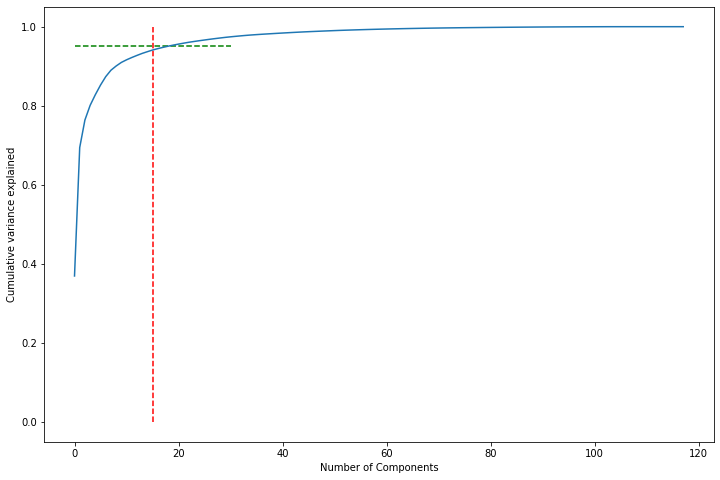

In [80]:
# check the variance visually
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of Components")
plt.show()

In [81]:
# perform  PCA for 18 components based on the above graph
pca_final = IncrementalPCA(n_components=18)

# crate a new dataframe with PCA 
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 18)

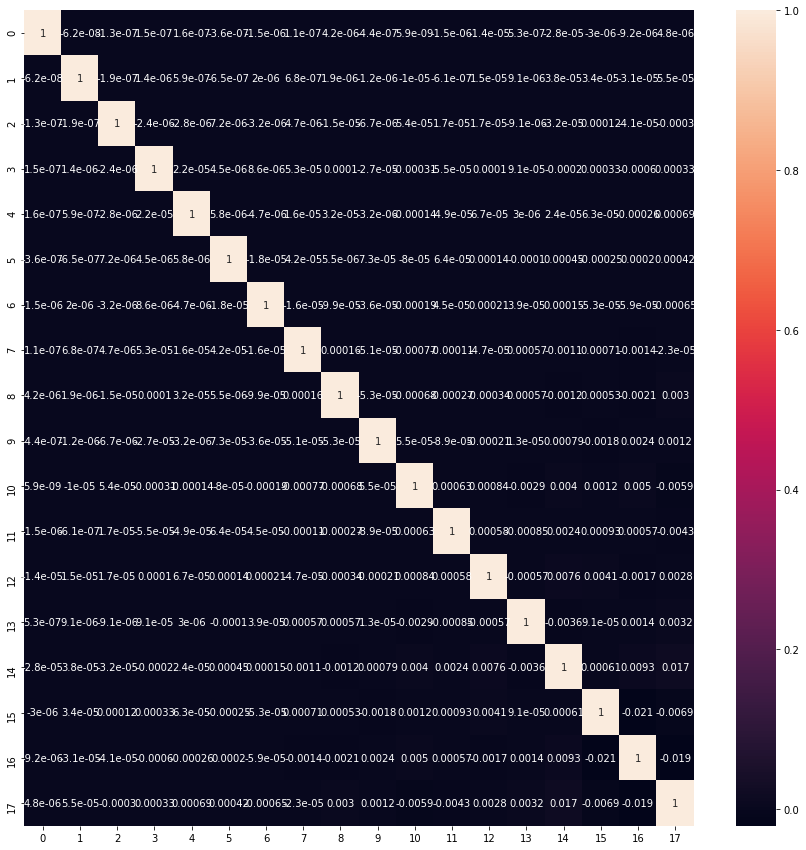

In [82]:
# lets review the correlation
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [83]:
# Now we can apply on the test set too
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9000, 18)

In [84]:
from sklearn import metrics
# now build and test logistic
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))


'0.85'

In [85]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_sm_pca, y_train_sm)
y_pred = lr_pca.predict(X_test_sm_pca)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7972222222222223
[[6590 1681]
 [ 144  585]]


In [86]:
from sklearn.ensemble import RandomForestClassifier 
params = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators':[100,200,300],
    'max_features': [12,15,20]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid= params,cv=4,n_jobs=1,verbose=1)

grid_search.fit(X_train_sm_pca,y_train_sm)

print(grid_search.best_score_)


Fitting 4 folds for each of 108 candidates, totalling 432 fits


KeyboardInterrupt: 

In [ ]:
# print(grid_search.best_params_)

In [ ]:
?GridSearchCV